In [908]:
#import functions
import pandas as pd

In [909]:
file = pd.read_csv("Monkey_Pox_Cases_Worldwide.csv")
file_1= pd.read_csv("monkeypox_time_series.csv")
file.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3050.0,0.0,5.0,2.0,7.0
1,Portugal,770.0,0.0,0.0,0.0,34.0
2,Spain,5792.0,0.0,13.0,2.0,0.0
3,United States,14050.0,0.0,4.0,41.0,10.0
4,Canada,1168.0,11.0,1.0,3.0,0.0


In [910]:
file_1.head()


,Country,Date_confirmation,New_infected,Total_infected
0,World,2022-05-06,1,1
1,World,2022-05-07,0,1
2,World,2022-05-08,0,1
3,World,2022-05-09,0,1
4,World,2022-05-10,0,1


In [911]:
file.describe()

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,359.853448,22.456897,1.163793,2.189655,0.741379
std,1516.114188,207.432981,2.892100,4.976316,3.664449
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,0.000000,1.000000,3.000000,0.000000
max,14050.000000,2217.000000,18.000000,41.000000,34.000000


In [912]:
import numpy as np
country= file[["Country",'Confirmed_Cases']]
print(country)

                      Country  Confirmed_Cases
0                     England           3050.0
1                    Portugal            770.0
2                       Spain           5792.0
3               United States          14050.0
4                      Canada           1168.0
..                        ...              ...
111  Central African Republic              8.0
112         Republic of Congo              3.0
113                  Cameroon              7.0
114                   Liberia              2.0
115              Sierra Leone              0.0

[116 rows x 2 columns]


In [913]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            1754 non-null   object
 1   Date_confirmation  1754 non-null   object
 2   New_infected       1754 non-null   int64 
 3   Total_infected     1754 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 54.9+ KB


Text(0.5, 1.0, 'BIVARIATE ANALYSIS \n UPPER CASES AS CONFIRMED VS HOSPITALIZED')

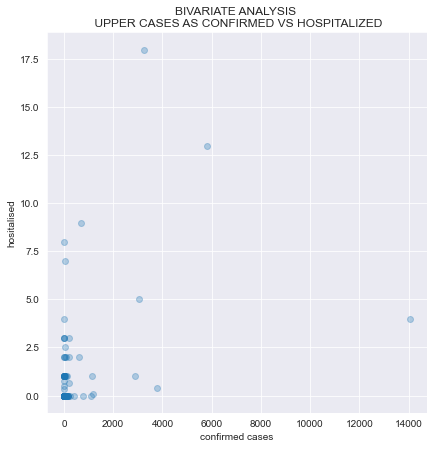

In [914]:
#EDA
#BI-VARIATE ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.scatter(file['Confirmed_Cases'], file['Hospitalized']/(file['Suspected_Cases'] + 1), alpha=.3)
plt.xlabel("confirmed cases")
plt.ylabel("hositalised")
plt.title("BIVARIATE ANALYSIS \n upper cases as confirmed vs hospitalized".upper())

In [915]:
top_affected=file_1['Country'].value_counts().nlargest(n=10)

top_affected

World             61
United Kingdom    61
Portugal          50
Spain             49
United States     49
Germany           48
Sweden            48
Canada            48
Italy             48
Belgium           48
Name: Country, dtype: int64

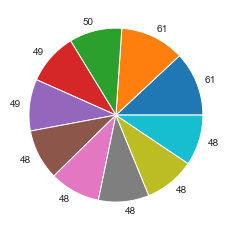

In [916]:
figsize= (21,13)
plt.pie(top_affected,labels = top_affected)
plt.show()

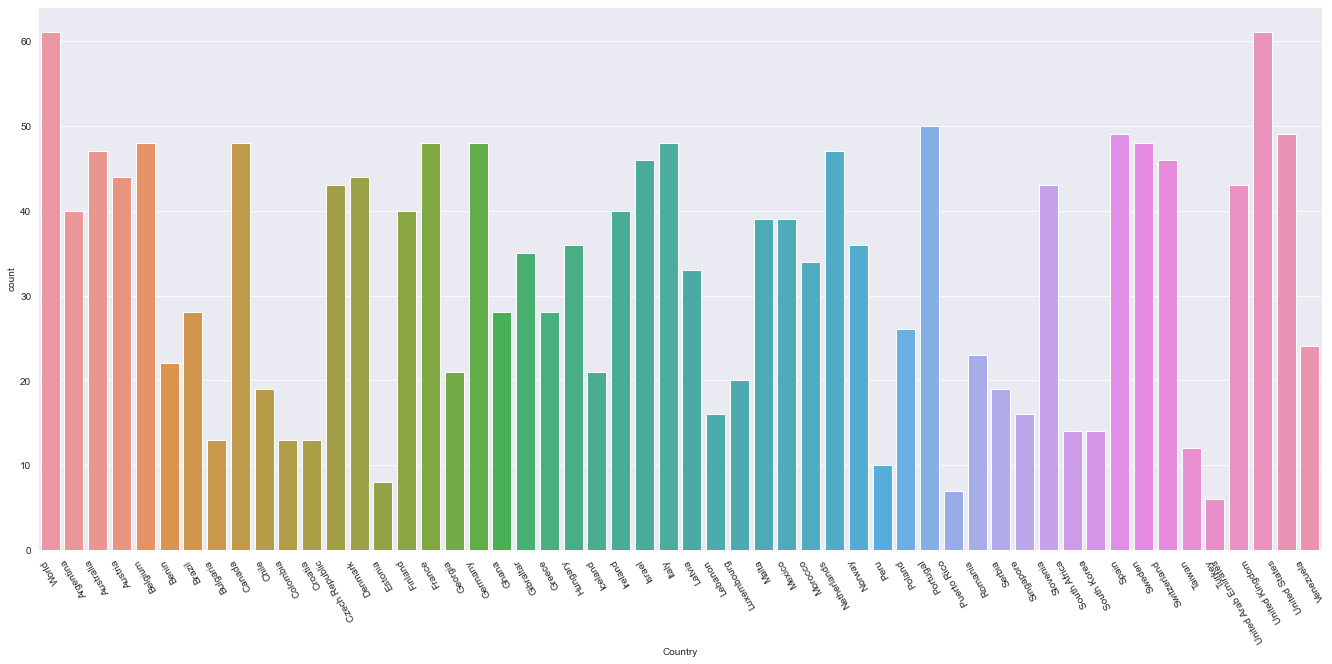

In [917]:
#UNIVARIATE ANALYSIS
plt.figure(figsize=(23,10))
sns.countplot(x= "Country", data = file_1 )
plt.xticks(rotation=120)
plt.show()

<AxesSubplot:>

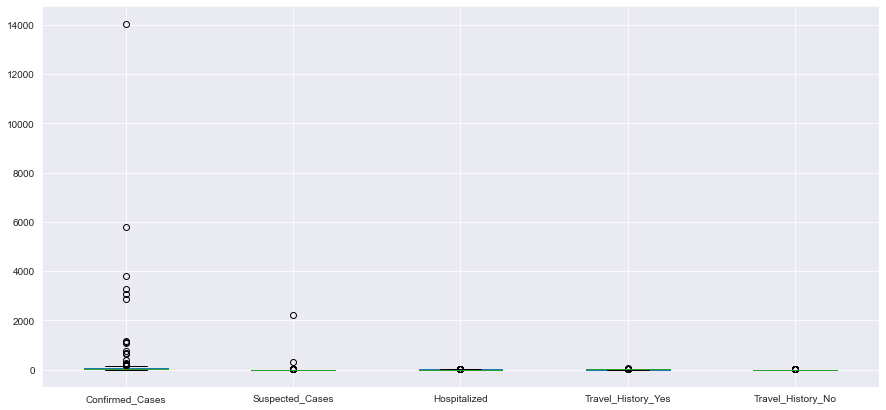

In [918]:
#MULTI-VARIATE ANALYSIS:
file.boxplot(figsize=(15,7))

In [919]:
import plotly.express as px
src=px.line(file_1,y="New_infected",x="Total_infected")
src.show()

array([[<AxesSubplot:title={'center':'New_infected'}>,
        <AxesSubplot:title={'center':'Total_infected'}>]], dtype=object)

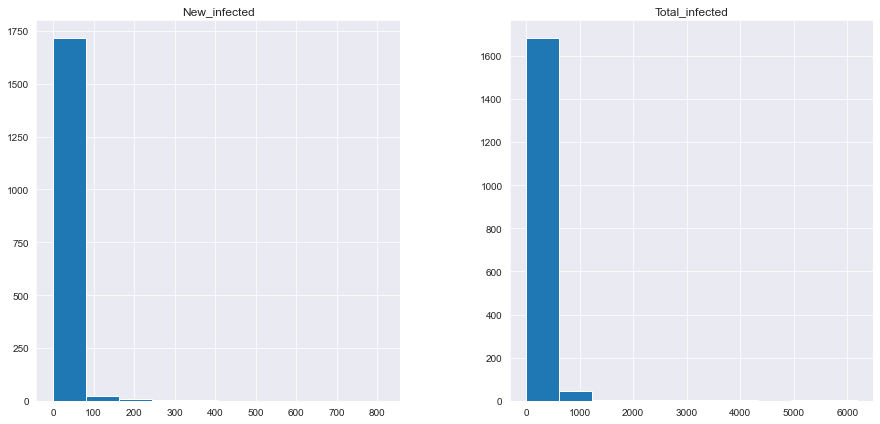

In [920]:
file_1.hist(figsize=(15,7))

In [921]:
#WORLDWIDE ANALYSIS:
def fig(file,key):
    figure = px.choropleth(file,locations='Country',locationmode='country names' ,color='Confirmed_Cases',hover_name='Country',height=600,width=800,color_continuous_scale='rainbow')
    figure.show()
fig(file,'Country')


<AxesSubplot:>

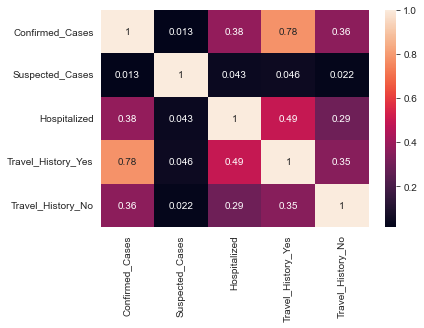

In [922]:
a = file.corr().abs()
sns.heatmap(a,annot=True)


<AxesSubplot:>

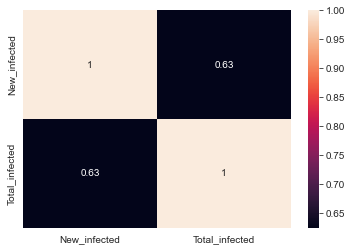

In [923]:
b = file_1.corr().abs()
sns.heatmap(b,annot=True)

In [924]:
#Implementing PROPHET model
import pandas as pd
import datetime
import prophet
file_1 = pd.read_csv("monkeypox_time_series.csv")
data= file_1.drop(columns=['New_infected','Country'])


In [925]:
data.head()

,Date_confirmation,Total_infected
0,2022-05-06,1
1,2022-05-07,1
2,2022-05-08,1
3,2022-05-09,1
4,2022-05-10,1


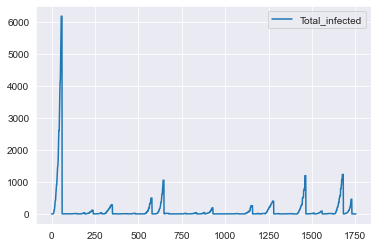

In [926]:
data.plot()
plt.show()

2022-08-31 17:22:01.118 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-08-31 17:22:01.139 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'case per country')

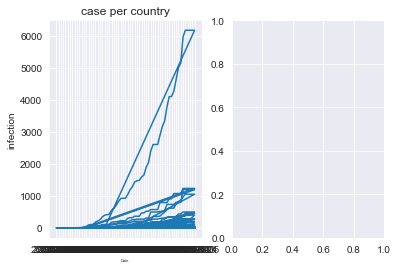

In [927]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(data["Date_confirmation"], data["Total_infected"])
ax1.set_xlabel("Date", fontsize=4)
ax1.set_ylabel("infection")
ax1.set_title("case per country")


<AxesSubplot:title={'center':'cases per affected monkey pox'}, xlabel='Date_confirmation'>

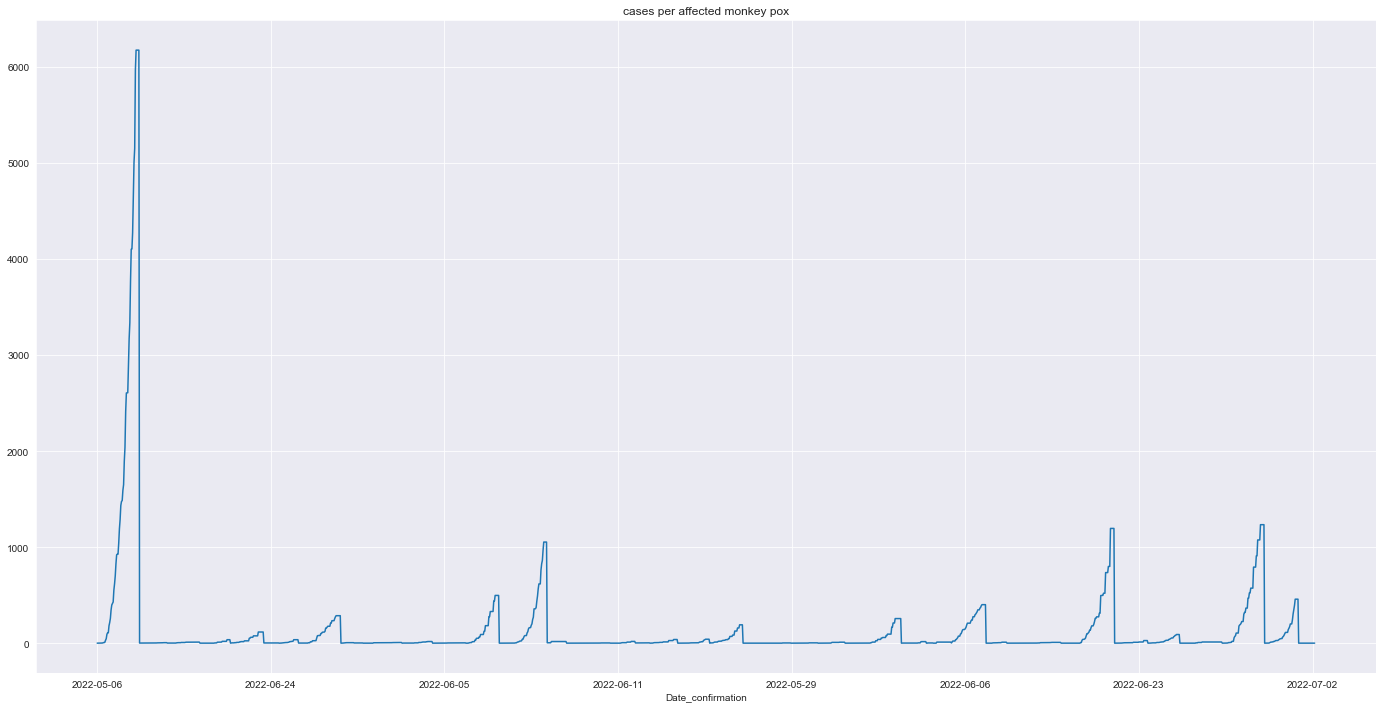

In [928]:
data.set_index("Date_confirmation").Total_infected.plot(figsize=(24,12), title="cases per affected monkey pox")

In [929]:
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'], format=('%Y-%m-%d'))
#data['ds']=datetime(data['ds'])

In [930]:
model = prophet.Prophet()
model.fit(data)

2022-08-31 17:22:03.078 cmd: where.exe tbb.dll
cwd: None
2022-08-31 17:22:03.214 TBB already found in load path
2022-08-31 17:22:03.259 Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-08-31 17:22:03.260 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-08-31 17:22:03.312 input tempfile: C:\Users\aruni\AppData\Local\Temp\tmpqd5u1nmu\c590hbrp.json
2022-08-31 17:22:03.332 input tempfile: C:\Users\aruni\AppData\Local\Temp\tmpqd5u1nmu\ta42qfl_.json
2022-08-31 17:22:03.346 idx 0
2022-08-31 17:22:03.346 running CmdStan, num_threads: None
2022-08-31 17:22:03.350 CmdStan args: ['C:\\Users\\aruni\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=23365', 'data', 'file=C:\\Users\\aruni\\AppData\\Local\\Temp\\tmpqd5u1nmu\\c590hbrp.json', 'init=C:\\Users\\aruni\\AppData\\Local\\Temp\\tmpqd5u1nmu\\ta42qfl_.json', 'output', 'file=C:\\Users\\ar

In [931]:
prediction = model.make_future_dataframe(periods=5)
History = model.predict(prediction)

In [932]:
History[['ds','yhat_lower', 'yhat_upper','yhat']].tail(10)

,ds,yhat_lower,yhat_upper,yhat
56,2022-07-01,-466.687131,867.141310,210.982805
57,2022-07-02,-436.027513,930.851630,211.667803
58,2022-07-03,-384.592128,889.092821,213.437389
59,2022-07-04,-467.461807,899.424915,220.342141
60,2022-07-05,-450.462407,840.496485,227.841563
61,2022-07-06,-418.526961,917.230623,230.144968
62,2022-07-07,-409.450280,910.721844,244.482757
63,2022-07-08,-396.611254,879.925360,250.640837
64,2022-07-09,-420.179508,883.752510,251.325836
65,2022-07-10,-467.532403,884.695087,253.095422


<AxesSubplot:>

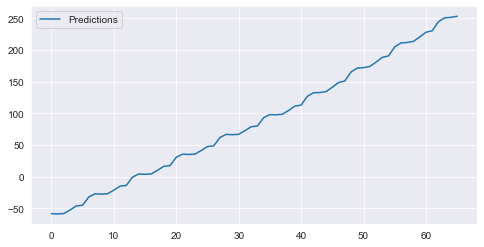

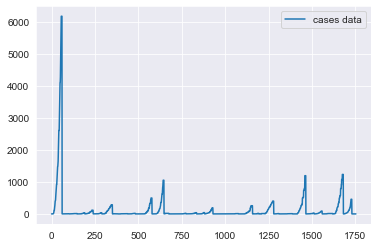

In [933]:
fig = History.plot(y='yhat', label='Predictions', legend=True, figsize=(8,4))
data.plot(y='y', label='cases data', legend=True)

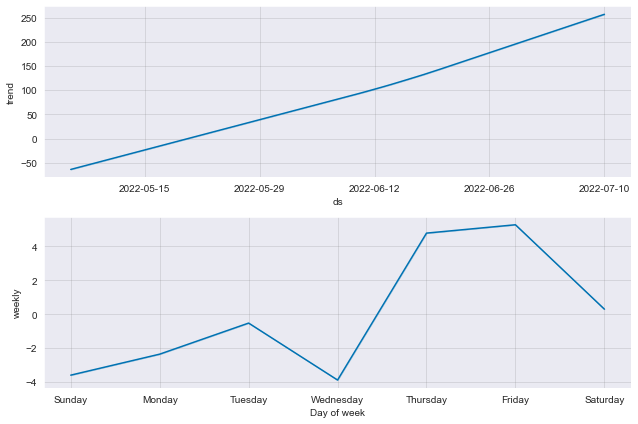

In [934]:
model.plot_components(History);

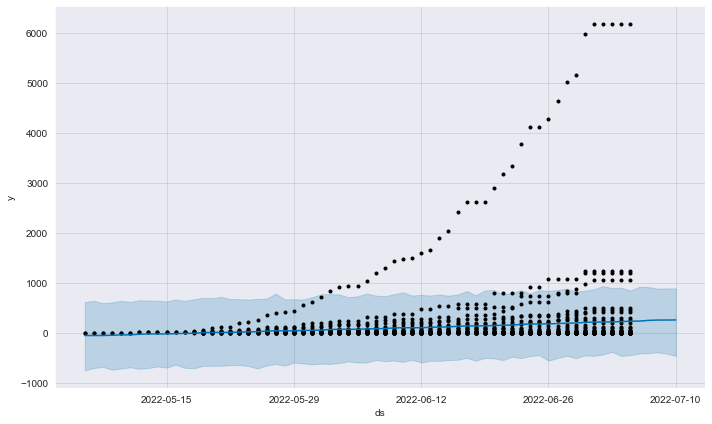

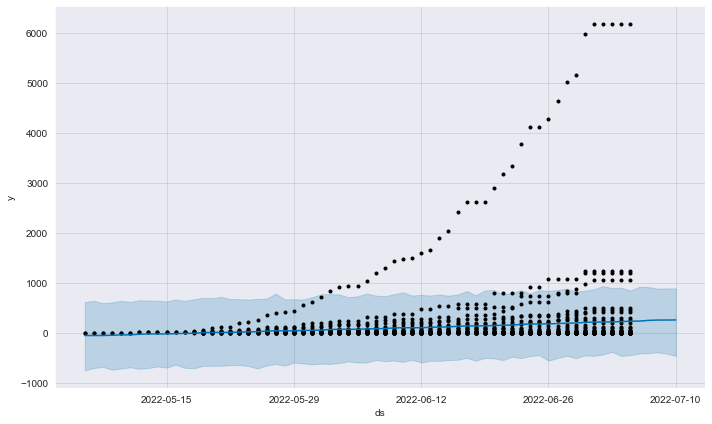

In [935]:
model.plot(History)

In [936]:
History['yhat']

0     -58.360392
1     -58.875069
2     -58.305160
3     -52.600084
4     -46.300338
         ...    
61    230.144968
62    244.482757
63    250.640837
64    251.325836
65    253.095422
Name: yhat, Length: 66, dtype: float64

In [937]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = History['yhat_upper'].values
y_pred = History['yhat'].values
Accuracy_1 = mean_absolute_percentage_error(y_true, y_pred)

In [938]:
print("MASE:",round(Accuracy_1,4)*100)

MASE: 89.63


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [939]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#lets use random forest
independent = file.drop(columns=['Country'])
dependent =file['Confirmed_Cases']
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.25,random_state=42)
Model = RandomForestRegressor(n_estimators=50, verbose=10)
Model.fit(X_train,y_train)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


RandomForestRegressor(n_estimators=50, verbose=10)

In [940]:
result=Model.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [941]:
print("Accuracy of Random forest model:",round(result,4)*100)

Accuracy of Random forest model: 91.73


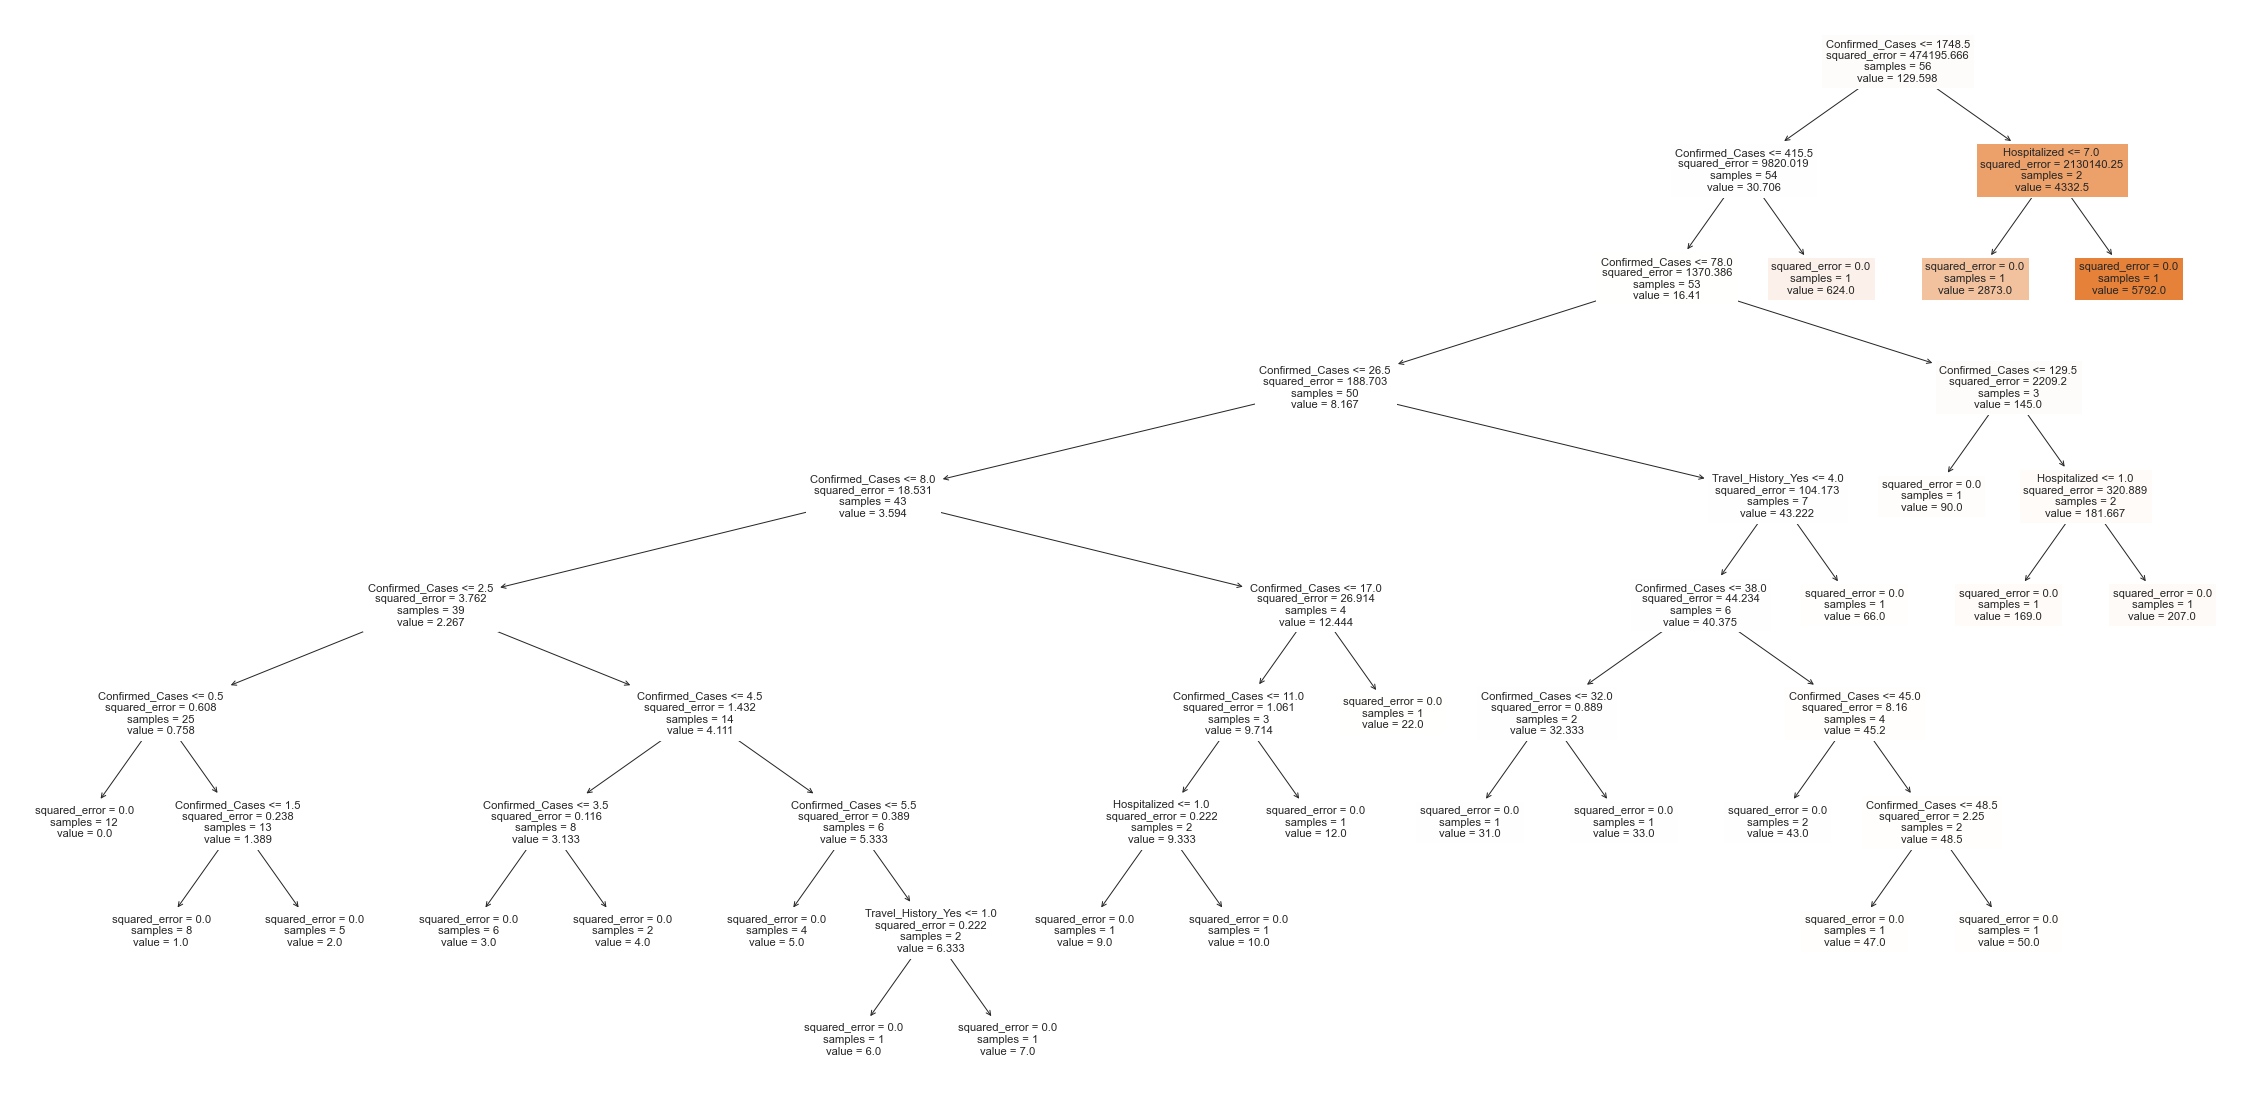

In [942]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(Model.estimators_[5], feature_names = independent.columns,class_names=['Travel_History_Yes', "Travel_History_No"],filled=True);
plt.savefig("tree.png")